In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
import numpy as np
from sklearn import datasets, linear_model

In [4]:
def my_plot(regr, x, y, xlab="x", ylab="y", size=0.1, reg=True):

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))

    if x.shape[1]>1:
        x_uni=x[:,1]
    else:
        x_uni=x
            
    # Plot outputs
    plt.scatter(x_uni, y,  color='black', s=size)
    if reg:
        plt.plot(x_uni, regr.predict(x), color='blue',linewidth=3)
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

In [5]:
def generate_simple_model(X, beta0, beta1, sigma2):
    return [beta0+x*beta1+np.random.normal(scale=sigma2) for x in X]

def plot_simple_data(X, y, alpha=0.001):
    plt.scatter(X, y)
    plt.xlabel("x")
    plt.ylabel("y")

In [25]:
f=pd.read_csv("pickups_zone_1_15min.csv")
f.columns

Index(['date', 'hour', 'minute', 'pickups'], dtype='object')

In [7]:
f.head()

,date,hour,minute,pickups
0,2009-01-01,0,0,0
1,2009-01-01,0,15,166
2,2009-01-01,0,30,215
3,2009-01-01,0,45,223
4,2009-01-01,1,0,245


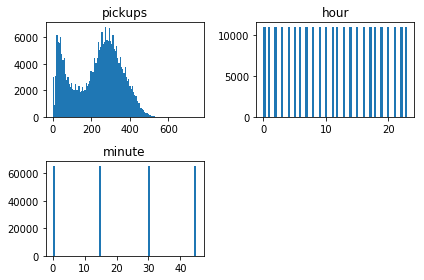

In [8]:
plt.figure(1)
plt.subplot(221)
plt.title("pickups")
plt.hist(f['pickups'], bins='auto')
z=plt.subplot(222)
plt.title("hour")
plt.hist(f['hour'], bins='auto')
plt.subplot(223)
plt.title("minute")
plt.hist(f['minute'], bins='auto')
plt.tight_layout()
plt.show()

In [9]:
y=np.array(f['pickups'], ndmin=2).T

In [10]:
y2=np.array(f['pickups']).T

In [11]:
y2

array([  0, 166, 215, ..., 283, 276, 230])

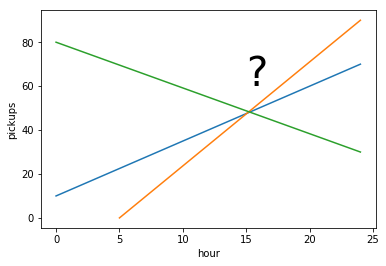

In [12]:

plt.plot([0,24], [10, 70])
plt.plot([5,24], [0, 90])
plt.plot([0,24], [80, 30])
plt.xlabel("hour")
plt.ylabel("pickups")
plt.annotate('?', xy=(15, 60), xytext=(15, 60), fontsize=40)
plt.show()

//anaconda/envs/snakes/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Coefficients: 
 [[ 103.49962716   10.90223842]]
Root Mean squared error: 99.83
Variance score: 0.36


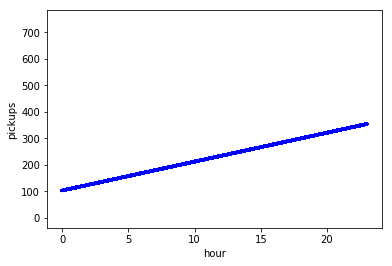

In [13]:
regr=linear_model.LinearRegression(fit_intercept=False)
x= np.c_[np.ones(len(f)),f['hour']]
regr.fit(x, y)
my_plot(regr, x, y, "hour", "pickups", False)

In [18]:
x= np.c_[np.ones(len(f)),f['hour']]
y= np.array(f['pickups'], ndmin=2).T
print(x.shape, y.shape)

(262848, 2) (262848, 1)


In [19]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

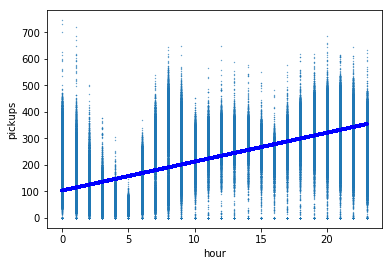

In [20]:
plt.scatter(f['hour'], y, s=0.1)
plt.plot(f['hour'], regr.predict(x), color='blue',linewidth=3)
plt.xlabel( "hour")
plt.ylabel("pickups")
plt.show()

In [21]:
print("Average error (AE): %.2f" % np.mean(regr.predict(x) - y))
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))

Average error (AE): -0.00
Mean Absolute error (MAE): 80.60
Root Mean squared error: 99.83


Coefficients: 
 [[ 103.49962716   10.90223842]]
Root Mean squared error: 93.24
Variance score: -0.94


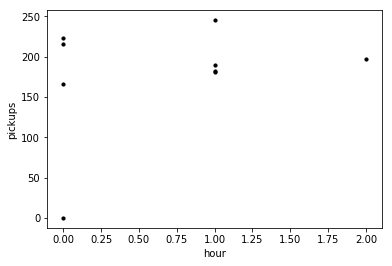

In [22]:
my_plot(regr, x[:9], y[:9], "hour", "pickups", size=10, reg=False)

Hmm... is the hour really telling us something?

Would minute be better?

In [23]:
x= np.c_[np.ones(len(f)),f['minute']]
y= np.array(f['pickups'], ndmin=2).T
regr.fit(x,y)
print(regr.coef_)
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))

[[  2.28008237e+02   3.85391811e-02]]
Mean Absolute error (MAE): 105.39
Root Mean squared error: 125.15


When the magnitude to the intercept is much higher than the other coefficients, it's usally a bad sign. Why?

In [33]:
#Same code as above, just for reference (and to initialize the variables, just in case...)

x= np.c_[np.ones(len(f)),f['hour']]
y= np.array(f['pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Just double checking. Are the OLS conditions verified?


We now do not know the true distribution. We only have the data. 

For the expected value of epsilon, $E(\epsilon_j)$, we will average from the sample. We have done this exact same thing before, remember?


In [34]:
print("Expected value of the error (or Average error, AE): %.2f" % np.mean(regr.predict(x) - y))

Expected value of the error (or Average error, AE): 0.00


For the variance, we can apply the formula in the slides, $s^2=\frac{\epsilon^T \epsilon}{n-2}$

In [35]:
def variance(error, N):
    e=np.array(error) #converting to numpy vector, just in case it comes as a list
                      #otherwise, the dot product (np.dot) will not work at all
    return np.dot(e.T, e)/(N-2)

In [36]:
error=regr.predict(x) - y

print "variance of all data is:", variance(error, len(f))

variance of all data is: [[ 9966.79630128]]


But, how do we know if it is in fact a constant variance?

In fact, we really can't! We can assume it and make some basic checks to see it is obviously false.

For example, we can split the dataset into two chunks, and check if the variance is the same... An idea: divide data into before noon and after noon.

In [37]:
fmorning=f.loc[f['hour'] <= 12]
fafternoon=f.loc[f['hour'] > 12]

let's now compare the variances in the model

In [38]:
x_morning=np.c_[np.ones(len(fmorning)),fmorning['hour']]


In [39]:
x_morning=np.c_[np.ones(len(fmorning)),fmorning['hour']]
y_morning=np.array(fmorning['pickups'], ndmin=2).T
error_morning=regr.predict(x_morning) - y_morning

print "variance of morning data is:", variance(error_morning, len(fmorning))

x_afternoon=np.c_[np.ones(len(fafternoon)),fafternoon['hour']]
y_afternoon=np.array(fafternoon['pickups'], ndmin=2).T
error_afternoon=regr.predict(x_afternoon) - y_afternoon

print "variance of morning data is:", variance(error_afternoon, len(fafternoon))



variance of morning data is: [[ 11522.29982083]]
variance of morning data is: [[ 8128.63472994]]


so... a little different, uh? Since the two datasets are extremely large, we can assume that indeed the true variance is not constant. A solution would be to create two separate models (one for morning, another for the afternoon). Let's keep it this way for now. 

In [40]:
x=np.c_[np.ones(len(f)),f['hour'], f['minute']]
y= np.array(f['pickups'], ndmin=2).T

regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

It is now very difficult to visualize, with two x variables!

So, we will now use a 45 degree plot (predicted pickups VS observed pickups)

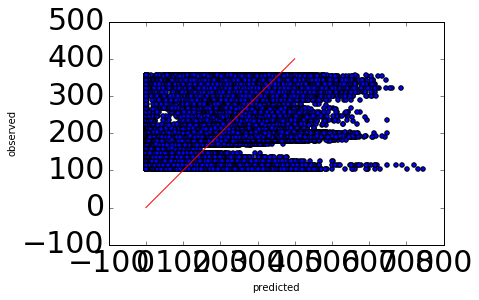

In [41]:
plt.scatter(y, regr.predict(x))
plt.xlabel("predicted")
plt.ylabel("observed")
plt.plot([0, 400], [0, 400], color="red")
plt.show()

Hmmm... it looks TERRIBLE!... What are the error statistics now?

In [42]:
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))

Mean Absolute error (MAE): 80.60
Root Mean squared error: 99.83


Wow, it did NOT improve AT ALL!!!!  :-(

In [44]:
f.corr()

,hour,minute,pickups
hour,1.000000,0.000000,0.603024
minute,0.000000,1.000000,0.005164
pickups,0.603024,0.005164,1.000000


In [45]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print 'Only works for DataFrame or Series'
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [46]:
f_lagged=buildLaggedFeatures(f, ['pickups'], lag=2)
fllen=len(f_lagged)

In [47]:
f_lagged.head()

,date,hour,minute,pickups,pickups_lag1,pickups_lag2
2,2009-01-01,0,30,215,166,0
3,2009-01-01,0,45,223,215,166
4,2009-01-01,1,0,245,223,215
5,2009-01-01,1,15,182,245,223
6,2009-01-01,1,30,181,182,245


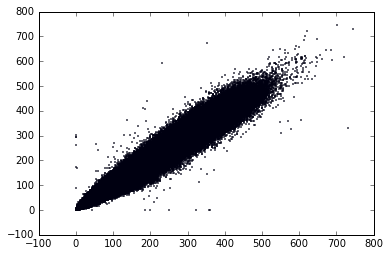

In [48]:
plt.scatter(f_lagged['pickups'], f_lagged['pickups_lag1'], s=0.5)

In [49]:
x=np.c_[np.ones(len(f_lagged)),f_lagged['pickups_lag1'], f_lagged['pickups_lag2']]

In [50]:
y=np.array(f_lagged['pickups'], ndmin=2).T

In [51]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

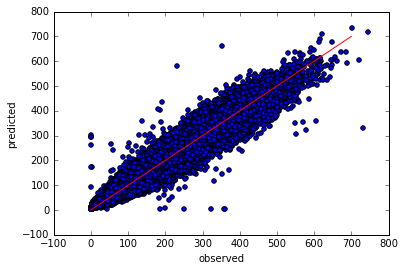

In [219]:
plt.scatter(y, regr.predict(x))
plt.xlabel("observed")
plt.ylabel("predicted")
plt.plot([0, 700], [0, 700], color="red")
plt.show()

In [220]:
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))

Mean Absolute error (MAE): 20.39
Root Mean squared error: 26.85


('Coefficients: \n', array([[  5.30465767e+00,   9.71728221e-01,   5.09589615e-03]]))
Root Mean squared error: 26.85
Variance score: 0.95


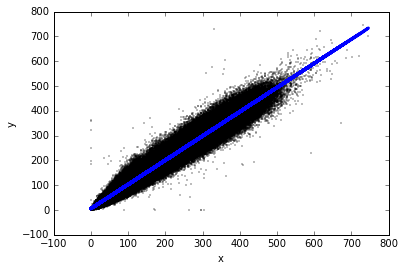

In [213]:
my_plot(regr, x, y)

('Coefficients: \n', array([[ 0.67497302]]))
Root Mean squared error: 92.34
Variance score: 0.46


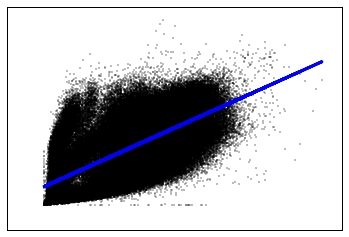

In [111]:
x=np.array(f_lagged['pickups_lag8'], ndmin=2).T
regr.fit(x, y)
my_plot(regr, x, y)

In [112]:
f_lagged.corr()

,hour,minute,pickups,pickups_lag1,pickups_lag2,pickups_lag3,pickups_lag4,pickups_lag5,pickups_lag6,pickups_lag7,pickups_lag8
hour,1.000000e+00,1.862985e-21,0.603031,0.602306,0.597127,0.586995,0.573260,0.557828,0.538191,0.514636,0.487869
minute,1.862985e-21,1.000000e+00,0.005157,-0.000352,-0.005007,0.000213,0.005158,-0.000353,-0.005007,0.000216,0.005169
pickups,6.030310e-01,5.157070e-03,1.000000,0.976707,0.954193,0.922649,0.883666,0.836886,0.785305,0.731071,0.674974
pickups_lag1,6.023058e-01,-3.523009e-04,0.976707,1.000000,0.976707,0.954193,0.922649,0.883666,0.836887,0.785305,0.731070
pickups_lag2,5.971272e-01,-5.007260e-03,0.954193,0.976707,1.000000,0.976707,0.954193,0.922649,0.883666,0.836887,0.785303
pickups_lag3,5.869955e-01,2.134090e-04,0.922649,0.954193,0.976707,1.000000,0.976706,0.954192,0.922649,0.883666,0.836884
pickups_lag4,5.732604e-01,5.157725e-03,0.883666,0.922649,0.954193,0.976706,1.000000,0.976706,0.954192,0.922648,0.883660
pickups_lag5,5.578282e-01,-3.530220e-04,0.836886,0.883666,0.922649,0.954192,0.976706,1.000000,0.976706,0.954192,0.922643
pickups_lag6,5.381906e-01,-5.006660e-03,0.785305,0.836887,0.883666,0.922649,0.954192,0.976706,1.000000,0.976706,0.954187
pickups_lag7,5.146355e-01,2.164413e-04,0.731071,0.785305,0.836887,0.883666,0.922648,0.954192,0.976706,1.000000,0.976703
